**Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler

**Dataset**

In [2]:
dataframe=pd.read_csv('../input/BankNote_Authentication.csv')
dataset=dataframe.values
dataframe.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

**Visualizations**

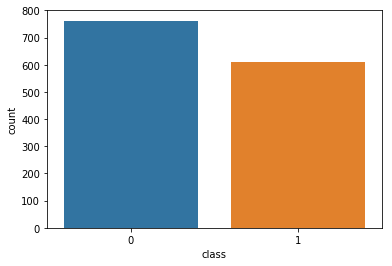

In [3]:
sns.countplot(x='class',data=dataframe)

In [4]:
print(dataframe.info())
dataframe.corr(method='spearman').style.background_gradient(cmap='coolwarm')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


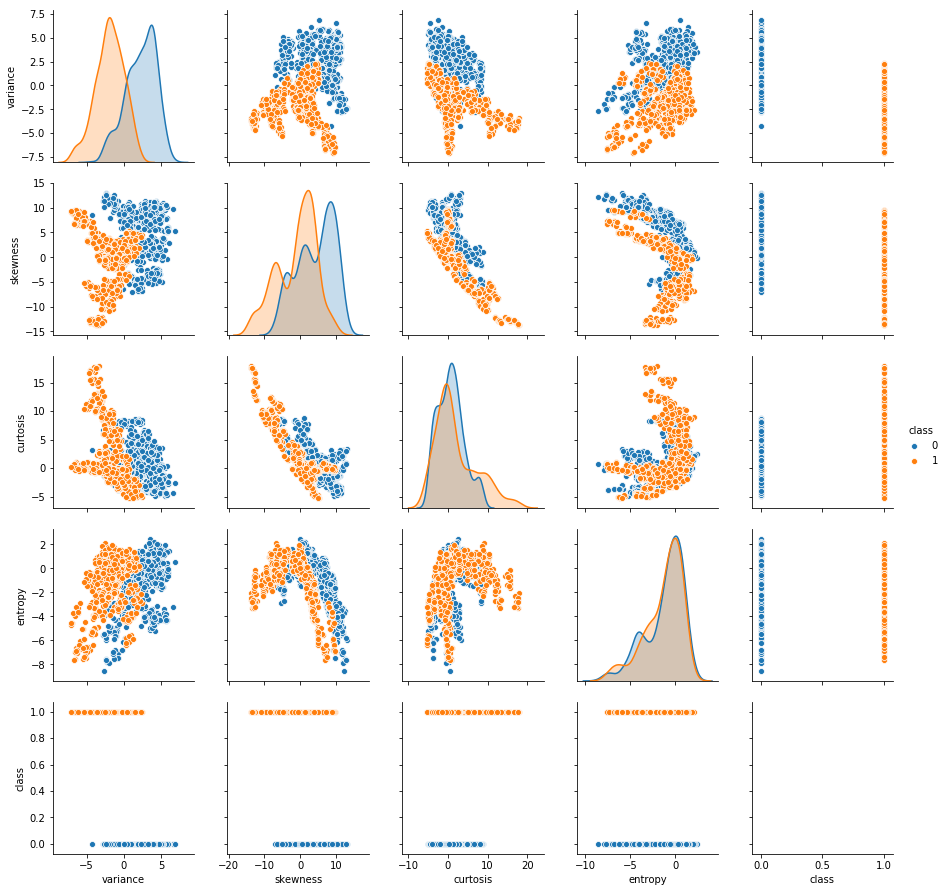

In [5]:
sns.pairplot(dataframe, hue="class")

**Extracting Input and Output**

In [6]:
X=dataframe.iloc[:,0:4].values
Y=dataframe.iloc[:,4].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

**Scaling Data**

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**

In [8]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(solver='liblinear',random_state=42)
classifier.fit(X_train,Y_train)

accuracies=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=10)
print("Accuracies:\n",accuracies)

Y_test_pred=classifier.predict(X_test)

cm=confusion_matrix(Y_test,Y_test_pred)
acc=accuracy_score(Y_test,Y_test_pred)
print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [0.98198198 0.99099099 0.98181818 0.99090909 0.99090909 0.98165138
 0.97247706 0.99082569 0.97247706 0.98165138]
Mean Accuracy:  0.9835691905416677


**Support Vector Machine**

In [9]:
from sklearn.svm import SVC

classifier=SVC(kernel='linear')
classifier.fit(X_train,Y_train)

accuracies=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=10)
print("Accuracies:\n",accuracies)

Y_test_pred=classifier.predict(X_test)

cm=confusion_matrix(Y_test,Y_test_pred)
acc=accuracy_score(Y_test,Y_test_pred)
print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [0.99099099 0.99099099 0.99090909 0.99090909 0.99090909 0.98165138
 0.97247706 0.99082569 0.97247706 0.98165138]
Mean Accuracy:  0.9853791823516594


Kernel SVM

In [10]:
from sklearn.svm import SVC

classifier=SVC(kernel='rbf',gamma='auto')
classifier.fit(X_train,Y_train)

accuracies=cross_val_score(estimator=classifier,X=X_test,y=Y_test,cv=10)
print("Accuracies:\n",accuracies)
print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [1.         0.96428571 1.         1.         1.         1.
 0.96428571 1.         1.         1.        ]
Mean Accuracy:  0.9928571428571429


**Random Forest**

In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)
accuracies=cross_val_score(estimator=classifier,X=X_test,y=Y_test,cv=10)
 
print("Accuracies:\n",accuracies)
print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [0.96428571 1.         0.89285714 0.96428571 1.         0.96428571
 1.         0.96296296 1.         1.        ]
Mean Accuracy:  0.9748677248677249


**Multilayer Perceptron**

In [12]:
from sklearn.neural_network import MLPClassifier
classifier=MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
classifier.fit(X_train,Y_train)
accuracies=cross_val_score(estimator=classifier,X=X_test,y=Y_test,cv=10)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 61, loss = 0.68913388
Iteration 62, loss = 0.68589264
Iteration 63, loss = 0.68279815
Iteration 64, loss = 0.67959593
Iteration 65, loss = 0.67665969
Iteration 66, loss = 0.67369869
Iteration 67, loss = 0.67074037
Iteration 68, loss = 0.66793161
Iteration 69, loss = 0.66502675
Iteration 70, loss = 0.66227768
Iteration 71, loss = 0.65943683
Iteration 72, loss = 0.65671200
Iteration 73, loss = 0.65390359
Iteration 74, loss = 0.65117480
Iteration 75, loss = 0.64845979
Iteration 76, loss = 0.64573897
Iteration 77, loss = 0.64303636
Iteration 78, loss = 0.64035811
Iteration 79, loss = 0.63772134
Iteration 80, loss = 0.63510050
Iteration 81, loss = 0.63245408
Iteration 82, loss = 0.62989902
Iteration 83, loss = 0.62729651
Iteration 84, loss = 0.62468519
Iteration 85, loss = 0.62213611
Iteration 86, loss = 0.61953900
Iteration 87, loss = 0.61695991
Iteration 88, loss = 0.61441320
Iteration 89, loss = 0.61186128
Iteration 90, loss = 0.60933388
Iteration 91, loss = 0.60679272
Iteratio

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 62, loss = 0.68638941
Iteration 63, loss = 0.68326864
Iteration 64, loss = 0.68011906
Iteration 65, loss = 0.67715892
Iteration 66, loss = 0.67424079
Iteration 67, loss = 0.67124514
Iteration 68, loss = 0.66847300
Iteration 69, loss = 0.66553256
Iteration 70, loss = 0.66281070
Iteration 71, loss = 0.65995989
Iteration 72, loss = 0.65725613
Iteration 73, loss = 0.65443971
Iteration 74, loss = 0.65174448
Iteration 75, loss = 0.64900530
Iteration 76, loss = 0.64627414
Iteration 77, loss = 0.64358511
Iteration 78, loss = 0.64088997
Iteration 79, loss = 0.63825574
Iteration 80, loss = 0.63560560
Iteration 81, loss = 0.63294966
Iteration 82, loss = 0.63034024
Iteration 83, loss = 0.62774287
Iteration 84, loss = 0.62507733
Iteration 85, loss = 0.62253007
Iteration 86, loss = 0.61992816
Iteration 87, loss = 0.61733878
Iteration 88, loss = 0.61474525
Iteration 89, loss = 0.61222777
Iteration 90, loss = 0.60966141
Iteration 91, loss = 0.60707329
Iteration 92, loss = 0.60460827
Iteratio

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 109, loss = 0.55972363
Iteration 110, loss = 0.55748153
Iteration 111, loss = 0.55527157
Iteration 112, loss = 0.55302701
Iteration 113, loss = 0.55086304
Iteration 114, loss = 0.54859731
Iteration 115, loss = 0.54640070
Iteration 116, loss = 0.54421332
Iteration 117, loss = 0.54195190
Iteration 118, loss = 0.53979984
Iteration 119, loss = 0.53754004
Iteration 120, loss = 0.53534277
Iteration 121, loss = 0.53318824
Iteration 122, loss = 0.53103790
Iteration 123, loss = 0.52890858
Iteration 124, loss = 0.52678926
Iteration 125, loss = 0.52467650
Iteration 126, loss = 0.52256329
Iteration 127, loss = 0.52047578
Iteration 128, loss = 0.51838336
Iteration 129, loss = 0.51629314
Iteration 130, loss = 0.51428101
Iteration 131, loss = 0.51226764
Iteration 132, loss = 0.51025513
Iteration 133, loss = 0.50827574
Iteration 134, loss = 0.50630541
Iteration 135, loss = 0.50431040
Iteration 136, loss = 0.50234112
Iteration 137, loss = 0.50032891
Iteration 138, loss = 0.49832514
Iteration 

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 47, loss = 0.73241831
Iteration 48, loss = 0.72878250
Iteration 49, loss = 0.72516339
Iteration 50, loss = 0.72159567
Iteration 51, loss = 0.71816732
Iteration 52, loss = 0.71467540
Iteration 53, loss = 0.71132474
Iteration 54, loss = 0.70789506
Iteration 55, loss = 0.70460342
Iteration 56, loss = 0.70128541
Iteration 57, loss = 0.69791647
Iteration 58, loss = 0.69467571
Iteration 59, loss = 0.69143790
Iteration 60, loss = 0.68815847
Iteration 61, loss = 0.68491364
Iteration 62, loss = 0.68188443
Iteration 63, loss = 0.67881353
Iteration 64, loss = 0.67570579
Iteration 65, loss = 0.67284629
Iteration 66, loss = 0.66988260
Iteration 67, loss = 0.66694398
Iteration 68, loss = 0.66415956
Iteration 69, loss = 0.66120044
Iteration 70, loss = 0.65844231
Iteration 71, loss = 0.65552965
Iteration 72, loss = 0.65278005
Iteration 73, loss = 0.64993692
Iteration 74, loss = 0.64723615
Iteration 75, loss = 0.64445022
Iteration 76, loss = 0.64177421
Iteration 77, loss = 0.63908470
Iteratio

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 55, loss = 0.70454550
Iteration 56, loss = 0.70115835
Iteration 57, loss = 0.69770108
Iteration 58, loss = 0.69440466
Iteration 59, loss = 0.69110946
Iteration 60, loss = 0.68774565
Iteration 61, loss = 0.68449378
Iteration 62, loss = 0.68136257
Iteration 63, loss = 0.67824092
Iteration 64, loss = 0.67511654
Iteration 65, loss = 0.67214283
Iteration 66, loss = 0.66909436
Iteration 67, loss = 0.66608741
Iteration 68, loss = 0.66321437
Iteration 69, loss = 0.66018039
Iteration 70, loss = 0.65735621
Iteration 71, loss = 0.65440583
Iteration 72, loss = 0.65161792
Iteration 73, loss = 0.64876363
Iteration 74, loss = 0.64602723
Iteration 75, loss = 0.64320289
Iteration 76, loss = 0.64050173
Iteration 77, loss = 0.63777471
Iteration 78, loss = 0.63506111
Iteration 79, loss = 0.63238493
Iteration 80, loss = 0.62971096
Iteration 81, loss = 0.62703738
Iteration 82, loss = 0.62438276
Iteration 83, loss = 0.62174675
Iteration 84, loss = 0.61907970
Iteration 85, loss = 0.61653041
Iteratio

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 77, loss = 0.64066068
Iteration 78, loss = 0.63804924
Iteration 79, loss = 0.63539546
Iteration 80, loss = 0.63280921
Iteration 81, loss = 0.63023602
Iteration 82, loss = 0.62762679
Iteration 83, loss = 0.62509072
Iteration 84, loss = 0.62248994
Iteration 85, loss = 0.62001824
Iteration 86, loss = 0.61744054
Iteration 87, loss = 0.61498805
Iteration 88, loss = 0.61247880
Iteration 89, loss = 0.61004127
Iteration 90, loss = 0.60756127
Iteration 91, loss = 0.60511999
Iteration 92, loss = 0.60269694
Iteration 93, loss = 0.60027150
Iteration 94, loss = 0.59783367
Iteration 95, loss = 0.59538523
Iteration 96, loss = 0.59301809
Iteration 97, loss = 0.59057511
Iteration 98, loss = 0.58819345
Iteration 99, loss = 0.58579658
Iteration 100, loss = 0.58338465
Iteration 101, loss = 0.58102282
Iteration 102, loss = 0.57861896
Iteration 103, loss = 0.57620857
Iteration 104, loss = 0.57386919
Iteration 105, loss = 0.57148318
Iteration 106, loss = 0.56914853
Iteration 107, loss = 0.56685091


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 73, loss = 0.64304057
Iteration 74, loss = 0.64027332
Iteration 75, loss = 0.63745007
Iteration 76, loss = 0.63472068
Iteration 77, loss = 0.63199133
Iteration 78, loss = 0.62932035
Iteration 79, loss = 0.62663598
Iteration 80, loss = 0.62399666
Iteration 81, loss = 0.62138727
Iteration 82, loss = 0.61871093
Iteration 83, loss = 0.61610004
Iteration 84, loss = 0.61345834
Iteration 85, loss = 0.61088328
Iteration 86, loss = 0.60823189
Iteration 87, loss = 0.60572298
Iteration 88, loss = 0.60312254
Iteration 89, loss = 0.60061742
Iteration 90, loss = 0.59806719
Iteration 91, loss = 0.59556140
Iteration 92, loss = 0.59308759
Iteration 93, loss = 0.59060197
Iteration 94, loss = 0.58810631
Iteration 95, loss = 0.58559150
Iteration 96, loss = 0.58315410
Iteration 97, loss = 0.58064182
Iteration 98, loss = 0.57821085
Iteration 99, loss = 0.57577142
Iteration 100, loss = 0.57335570
Iteration 101, loss = 0.57099257
Iteration 102, loss = 0.56860750
Iteration 103, loss = 0.56621887
Iter

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 44, loss = 0.73276531
Iteration 45, loss = 0.72866769
Iteration 46, loss = 0.72454638
Iteration 47, loss = 0.72059501
Iteration 48, loss = 0.71680804
Iteration 49, loss = 0.71300424
Iteration 50, loss = 0.70936425
Iteration 51, loss = 0.70577444
Iteration 52, loss = 0.70225899
Iteration 53, loss = 0.69887470
Iteration 54, loss = 0.69552655
Iteration 55, loss = 0.69209078
Iteration 56, loss = 0.68883663
Iteration 57, loss = 0.68573012
Iteration 58, loss = 0.68240563
Iteration 59, loss = 0.67941449
Iteration 60, loss = 0.67637121
Iteration 61, loss = 0.67347396
Iteration 62, loss = 0.67058170
Iteration 63, loss = 0.66777323
Iteration 64, loss = 0.66498846
Iteration 65, loss = 0.66232630
Iteration 66, loss = 0.65963087
Iteration 67, loss = 0.65695033
Iteration 68, loss = 0.65427106
Iteration 69, loss = 0.65164492
Iteration 70, loss = 0.64906808
Iteration 71, loss = 0.64636658
Iteration 72, loss = 0.64380812
Iteration 73, loss = 0.64122191
Iteration 74, loss = 0.63862703
Iteratio

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 62, loss = 0.67935366
Iteration 63, loss = 0.67642113
Iteration 64, loss = 0.67352825
Iteration 65, loss = 0.67063505
Iteration 66, loss = 0.66777223
Iteration 67, loss = 0.66492136
Iteration 68, loss = 0.66214202
Iteration 69, loss = 0.65939727
Iteration 70, loss = 0.65657682
Iteration 71, loss = 0.65387589
Iteration 72, loss = 0.65119064
Iteration 73, loss = 0.64852061
Iteration 74, loss = 0.64580949
Iteration 75, loss = 0.64315080
Iteration 76, loss = 0.64042454
Iteration 77, loss = 0.63778677
Iteration 78, loss = 0.63516911
Iteration 79, loss = 0.63251542
Iteration 80, loss = 0.62994864
Iteration 81, loss = 0.62735898
Iteration 82, loss = 0.62485535
Iteration 83, loss = 0.62231770
Iteration 84, loss = 0.61980789
Iteration 85, loss = 0.61735247
Iteration 86, loss = 0.61483061
Iteration 87, loss = 0.61238648
Iteration 88, loss = 0.60987547
Iteration 89, loss = 0.60738836
Iteration 90, loss = 0.60497445
Iteration 91, loss = 0.60250314
Iteration 92, loss = 0.60006715
Iteratio

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 44, loss = 0.73481374
Iteration 45, loss = 0.73064283
Iteration 46, loss = 0.72653998
Iteration 47, loss = 0.72262701
Iteration 48, loss = 0.71874301
Iteration 49, loss = 0.71496059
Iteration 50, loss = 0.71127044
Iteration 51, loss = 0.70771858
Iteration 52, loss = 0.70416043
Iteration 53, loss = 0.70077655
Iteration 54, loss = 0.69744151
Iteration 55, loss = 0.69411041
Iteration 56, loss = 0.69090899
Iteration 57, loss = 0.68783191
Iteration 58, loss = 0.68460074
Iteration 59, loss = 0.68162183
Iteration 60, loss = 0.67847290
Iteration 61, loss = 0.67555264
Iteration 62, loss = 0.67250332
Iteration 63, loss = 0.66953700
Iteration 64, loss = 0.66662989
Iteration 65, loss = 0.66372911
Iteration 66, loss = 0.66086043
Iteration 67, loss = 0.65798039
Iteration 68, loss = 0.65517880
Iteration 69, loss = 0.65240410
Iteration 70, loss = 0.64960445
Iteration 71, loss = 0.64683787
Iteration 72, loss = 0.64410666
Iteration 73, loss = 0.64138913
Iteration 74, loss = 0.63866995
Iteratio

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
print("Accuracies:\n",accuracies)
print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy:  1.0
